In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

In [30]:
# uploading train DataSet
salary_train=pd.read_csv("SalaryData_Train.csv")
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
#uploading test DataSet
salary_test=pd.read_csv("SalaryData_Test.csv")
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [31]:
#find duplicate in train data set
salary_train[salary_train.duplicated()]


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


## EDA

In [32]:
salary_train[salary_train.duplicated()].shape


(3258, 14)

In [33]:
#Drop Duplicate in train data set
salary_train=salary_train.drop_duplicates()


In [34]:
salary_train[salary_train.duplicated()].shape


(0, 14)

In [35]:
#find duplicate in Test Data Set
salary_test[salary_test.duplicated()].shape

(0, 14)

In [37]:
#drop duplicate in Test Data Set
salary_test=salary_test.drop_duplicates()

In [38]:

salary_test[salary_test.duplicated()].shape

(0, 14)

## Visualization of Data

<AxesSubplot:xlabel='Salary', ylabel='count'>

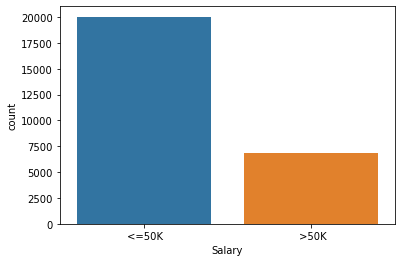

In [39]:

sns.countplot(x =salary_train['Salary'])

<AxesSubplot:xlabel='Salary', ylabel='count'>

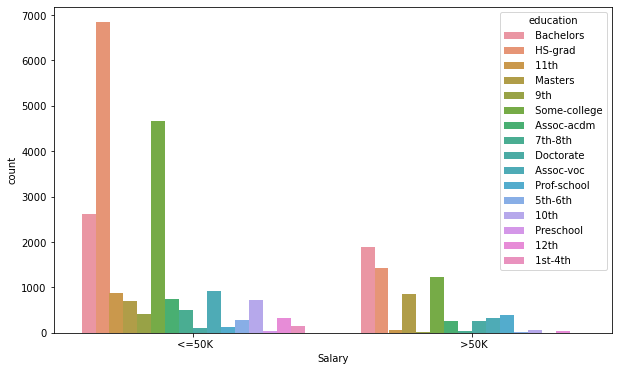

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x = salary_train['Salary'],hue=salary_train['education'])

<AxesSubplot:xlabel='Salary', ylabel='count'>

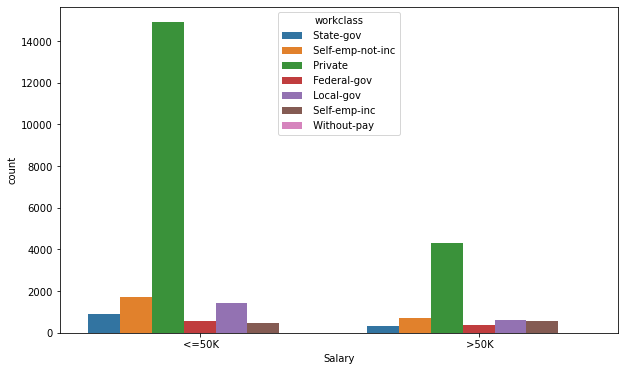

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(x = salary_train['Salary'],hue=salary_train['workclass'])


<AxesSubplot:xlabel='Salary', ylabel='count'>

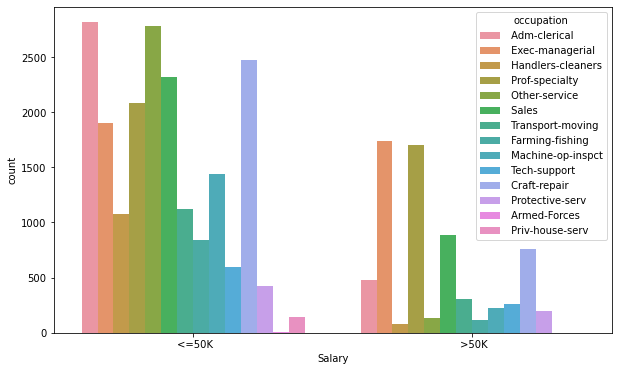

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(x = salary_train['Salary'],hue=salary_train['occupation'])

In [43]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [44]:
#Convert Categorical to Numerical Data in train Data Set
for i in salary_train:
    salary_train[i]=labelencoder.fit_transform(salary_train[i])

In [45]:
salary_train


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,36,2,12,13,2,3,0,4,1,0,0,39,37,1
30155,5,2,15,9,4,10,1,4,1,0,0,39,37,0
30156,10,2,7,11,2,12,5,4,0,0,0,37,37,0
30158,41,2,11,8,6,0,4,4,0,0,0,39,37,0


In [46]:
# Convert Categorical to Numerical Data in test Data Set
for i in salary_test:
    salary_test[i]=labelencoder.fit_transform(salary_test[i])

In [47]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,16,2,9,12,4,9,3,4,1,0,0,39,37,0
15056,22,2,9,12,0,9,1,4,0,0,0,35,37,0
15057,21,2,9,12,2,9,0,4,1,0,0,49,37,0
15058,27,2,9,12,0,0,3,1,1,73,0,39,37,0


In [49]:
#Split train Data in two part  X and y
X_train=salary_train.iloc[:,0:13]
y_train=salary_train.iloc[:,13]

In [50]:
#Split test Data in two part  X and y
X_test=salary_test.iloc[:,0:13]
y_test=salary_test.iloc[:,13]

## Naive Bayes Classifier


In [51]:
clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [52]:
#classification report
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.80      0.93      0.86     10620
           1       0.61      0.32      0.41      3510

    accuracy                           0.78     14130
   macro avg       0.71      0.62      0.64     14130
weighted avg       0.76      0.78      0.75     14130



In [53]:
score=clf.score(X_test,y_test)
score

0.7789808917197453

In [54]:
score1=np.mean(y_test==y_pred)
score1

0.7789808917197453